In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

https://docs.google.com/spreadsheets/d/1IFOUnrGGsXONB_T6HJUdwFJ0UjM6aTpRf1K8Oyd4AtY/edit?usp=sharing

In [79]:
filename="./tab.txt"

df = pd.read_csv(filename, delimiter='\t')
data = df.values 

In [80]:
data

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 2, 2, 1, 1, 2, 1],
       [2, 4, 3, 1, 1, 2, 3, 4, 5, 6],
       [3, 3, 3, 3, 3, 3, 3, 4, 6, 4]], dtype=int64)

In [81]:
data = -data
y = np.argsort(data, axis=1)

n_samples, n_features = data.shape
res = np.zeros_like(data)

for i in range(n_samples):
    n = 1
    for j in range(n_features):
        if j == 0:
            res[i, y[i, j]] = n
        elif data[i, y[i, j - 1]] == data[i, y[i, j]]:
            res[i, y[i, j]] = n
        else:
            n += 1
            res[i, y[i, j]] = n
            

for i in range(n_samples):
    n = 1
    for j in range(n_features):
        if j == 0:
            res[i, y[i, j]] = n
        elif data[i, y[i, j - 1]] == data[i, y[i, j]]:
            res[i, y[i, j]] = n
        else:
            n += 1
            res[i, y[i, j]] = n

res1 = np.copy(res)
res1 = res1.astype(float)

for i in range(n_samples):
    n = 0
    for j in range(1,12):
        v = np.where(res[i, :] == j)[0]
        if v.size == 0:
            break
        n += 1
        res1[i, v] = n + (v.size - 1) / 2.
        n = n + v.size -1

print(res1)


[[5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5]
 [7.  7.  7.  7.  2.  2.  7.  7.  2.  7. ]
 [7.5 3.5 5.5 9.5 9.5 7.5 5.5 3.5 2.  1. ]
 [7.  7.  7.  7.  7.  7.  7.  2.5 1.  2.5]]


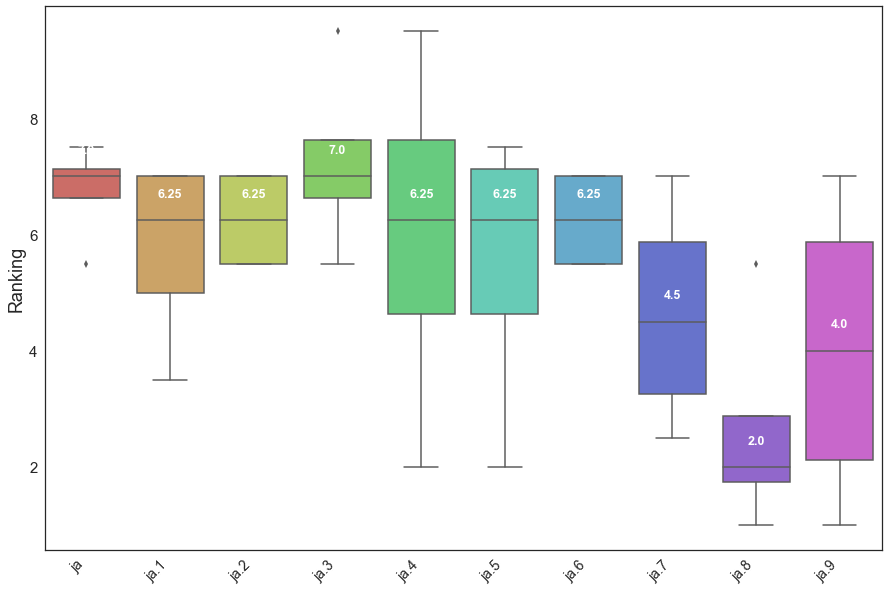

In [88]:
data = res1
name_list = df.columns.values

plt.figure(figsize=(15,10))
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

bplot = sns.boxplot(data = data, palette=sns.color_palette("hls", 11))

bplot.set_ylabel(r'Ranking', fontsize=18)

bplot.set_xticklabels(name_list, rotation=45, ha='right', fontsize=14)

medians = np.median(data, axis=0)
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos, bplot.get_xticklabels()):
    bplot.text(pos[tick], medians[tick] + 0.4, median_labels[tick],
            horizontalalignment='center', size='x-small', color='w', weight='semibold')

plt.show();